In [1]:
import pandas as pd
import numpy as np


# Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

# To supress warnings in Visualizations
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw=pd.read_excel("finalDAdata.xlsx")

In [3]:
raw

,InstituteName,PostId,Caption,Type,LikesCount,CommentsCount,Timestamp,Location,Hashtags,postrelatedcourse
0,Codemithra,3448148149413986816,Curious about #Gen AI? Learn all about Gen AI ...,Sidecar,20,0,2024-09-02T10:01:52.000Z,Banglore,#Gen #FREE #Master #Seats #webinar #artificial...,datascience
1,Jnana Infotech,3448167365869427200,Get Certified in IT Software in Jnana infotech...,Image,4,0,2024-09-02T10:40:03.000Z,Banglore,#cprogramming #programming #pythonprogramming ...,fullstack
2,NxtWave,3448211145763780096,"10+ Super Cool AI tools on your Fingertips, wi...",Video,1114,22,2024-09-02T12:07:31.000Z,Hyderabad,NaN,datascience
3,Ethnus Codemithra,3448782663051935744,"This Ganesha Chaturthi, enjoy special offers o...",Image,22,0,2024-09-03T07:02:32.000Z,Banglore,#Ethnus #Codemithra #FestiveDeals #GaneshChatu...,fullstack
4,Jnana Infotech,3448835080586237952,"""Join the best CAD training center in Bangalor...",Image,150,0,2024-09-03T08:46:41.000Z,Banglore,NaN,fullstack
...,...,...,...,...,...,...,...,...,...,...
844,Besant Technologies,3562809379612001792,Last week placements from Besant Technologies ...,Video,113,1,2025-02-07T14:53:49.000Z,Banglore,#Besanttechnologies #Placements #Interviews #P...,"fullstack,datascience"
845,Besant Technologies,3563164704288121856,Congrats Anubhav for getting placed as a Full ...,Video,30,0,2025-02-08T02:40:14.000Z,Banglore,#cloudcomputing #networkengineer #aws #ccna #c...,"fullstack,datascience"
846,Jnana Infotech,3563267144047989248,Congratulations to our students for successful...,Image,13,0,2025-02-08T06:02:46.000Z,Banglore,#SuccessStory #CertifiedProfessionals #Trainin...,successstory
847,Besant Technologies,3563553184583046144,Solve,Image,80,21,2025-02-08T15:31:05.000Z,Banglore,NaN,successstory


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   InstituteName      849 non-null    object
 1   PostId             849 non-null    int64 
 2   Caption            847 non-null    object
 3   Type               849 non-null    object
 4   LikesCount         849 non-null    int64 
 5   CommentsCount      849 non-null    int64 
 6   Timestamp          849 non-null    object
 7   Location           849 non-null    object
 8   Hashtags           748 non-null    object
 9   postrelatedcourse  840 non-null    object
dtypes: int64(3), object(7)
memory usage: 66.5+ KB


In [5]:
#####changing datatype of column  "Timestamp"
raw["Timestamp"]=pd.to_datetime(raw["Timestamp"],format="mixed")

In [6]:
raw.rename({'Timestamp':'Dateofpost'}, axis=1, inplace=True)

In [7]:
raw['Day'] = raw['Dateofpost'].dt.day_name()

In [8]:
raw.head()

,InstituteName,PostId,Caption,Type,LikesCount,CommentsCount,Dateofpost,Location,Hashtags,postrelatedcourse,Day
0,Codemithra,3448148149413986816,Curious about #Gen AI? Learn all about Gen AI ...,Sidecar,20,0,2024-09-02 10:01:52+00:00,Banglore,#Gen #FREE #Master #Seats #webinar #artificial...,datascience,Monday
1,Jnana Infotech,3448167365869427200,Get Certified in IT Software in Jnana infotech...,Image,4,0,2024-09-02 10:40:03+00:00,Banglore,#cprogramming #programming #pythonprogramming ...,fullstack,Monday
2,NxtWave,3448211145763780096,"10+ Super Cool AI tools on your Fingertips, wi...",Video,1114,22,2024-09-02 12:07:31+00:00,Hyderabad,NaN,datascience,Monday
3,Ethnus Codemithra,3448782663051935744,"This Ganesha Chaturthi, enjoy special offers o...",Image,22,0,2024-09-03 07:02:32+00:00,Banglore,#Ethnus #Codemithra #FestiveDeals #GaneshChatu...,fullstack,Tuesday
4,Jnana Infotech,3448835080586237952,"""Join the best CAD training center in Bangalor...",Image,150,0,2024-09-03 08:46:41+00:00,Banglore,NaN,fullstack,Tuesday


In [9]:
raw.shape


(849, 11)

In [11]:
##lowercase case sensitive
for col in raw.columns:
    if raw[col].dtype==object:
        raw[col]=raw[col].str.lower()

In [12]:
for col in raw.columns:
    print(f"Column: {col}")
    print()
    print(f"Data Type of Column: {raw[col].dtype}")
    print()
    print("Column Values:")
    print(raw[col].unique())
    print("=================================================================")
    print()

Column: InstituteName

Data Type of Column: object

Column Values:
['codemithra' 'jnana infotech' 'nxtwave' 'ethnus codemithra'
 'nxtwave institute of advanced technologies' 'akhil chowdary'
 'manjyoti parasar' 'uday | al | tech | tips' 'atharva patil'
 'besant technologies' 'navin kumar | job search strategist\u200d'
 'nandy | nandhini raja' 'jnana deepu js' 'naresh itech'
 'be practical tech solutions - software training institute'
 'm jeya rahul' 'full stack academy' "hyderabad business expo '25"
 'dw news hyderabad' 'the baigan vines official' 'jspiders jntu hyderabad'
 'mohammed abubakr' 'abu aimal azad' 'insight - analytics club@mu'
 '    ||    ' 'data science dojo' 'teks academy' 'tammu9' 'shubham lal']

Column: PostId

Data Type of Column: int64

Column Values:
[3448148149413986816 3448167365869427200 3448211145763780096
 3448782663051935744 3448835080586237952 3449569928552394240
 3449672004221742080 3449735085145205760 3450120929664425984
 3450237088094356992 3450315816321271

In [13]:
raw["InstituteName"]=raw["InstituteName"].replace({"nxtwave institute of advanced technologies":"nxtwave",'jnana deepu js':'jnana infotech',
                                                   "navin kumar | job search strategist\u200d":"jnana infotech",'atharva patil':"besant technologies",
                                                   'nandy | nandhini raja':'naresh itech','    ||    ':'data science dojo','dw news hyderabad':'jspiders jntu hyderabad',
                                                   "hyderabad business expo '25":"full stack academy","m jeya rahul":"full stack academy",
                                                   'the baigan vines official':"jspiders jntu hyderabad",'akhil chowdary':'ethnus codemithra', 'manjyoti parasar':'ethnus codemithra',
                                                   'mohammed abubakr':"insight - analytics club@mu", 'abu aimal azad':"insight - analytics club@mu",
                                                   'tammu9':'teks academy', 'shubham lal':'teks academy',"codemithra":"ethnus codemithra"})
                                                   

In [14]:
raw["InstituteName"].unique()

array(['ethnus codemithra', 'jnana infotech', 'nxtwave',
       'uday | al | tech | tips', 'besant technologies', 'naresh itech',
       'be practical tech solutions - software training institute',
       'full stack academy', 'jspiders jntu hyderabad',
       'insight - analytics club@mu', 'data science dojo', 'teks academy'],
      dtype=object)

In [15]:
raw['postrelatedcourse']=raw['postrelatedcourse'].replace({'fullstcak':"fullstack","data science":"datascience",
                                                            'devops,fullstack':"devops",'fullstack,datascience':"datascience"})

In [16]:
raw["postrelatedcourse"].unique()

array(['datascience', 'fullstack', 'devops', 'developer', 'marketing',
       'successstory', 'autocad', 'placement', nan, 'memes'], dtype=object)

In [17]:
raw["LikesCount"]=raw["LikesCount"].replace({-1:0})

In [18]:
raw["LikesCount"].unique()


array([   20,     4,  1114,    22,   150,     3,    33,   583,    23,
           6,    31,   858,    10,    24,   686,    35,   846,   438,
         495,    18,   842,   964,   678,    14,  1236,   103,    17,
          16,    25,   905,    11,  1091,   467,    21,   372,   599,
         745,     2,    34,     9,     7,   366,   559,   728,   607,
         468,  2153,    47,   219,    53,    37,     0,    28,    29,
          85,   709,   296,   456,   311,    15,   382,   505,   216,
         581,   647,  1088,   819,    45,  2916,    19,   368,  1123,
         157,   687,   695,  1068,    30,   335,  9238,  1954,   410,
         170,   799,     8,   533,  1244,   469,   885,   334,   431,
       21630,   522,   285,   872,   482,   390,    26,  1179,   264,
        1593,  2340,   705,     5,  1601,    96,    12,    57,   307,
         135,   510,   540,   115,   926,   114,   141,   140,   880,
         130,   632,    84,   108,    98,   143,    76,   147,   305,
         145,   155,

In [19]:
##nullvaluescheck
raw.isnull().sum()

InstituteName          0
PostId                 0
Caption                2
Type                   0
LikesCount             0
CommentsCount          0
Dateofpost             0
Location               0
Hashtags             101
postrelatedcourse      9
Day                    0
dtype: int64

In [20]:
###DUPLICATE ROWS CHECK
raw[raw.duplicated()]

,InstituteName,PostId,Caption,Type,LikesCount,CommentsCount,Dateofpost,Location,Hashtags,postrelatedcourse,Day


In [21]:
! pip install simple_colors

In [22]:
########ACCESSING CODE USING PYTHON FILE FOR UNIVARIATE ANALYSIS
from Eda import univariate

In [23]:
# Taking Columns in Order

data = raw[['InstituteName','Type','LikesCount','CommentsCount',"Dateofpost",'Location','postrelatedcourse','Day']]

Column: InstituteName

*****************************************
          Descriptive Stats              
*****************************************

Number of Unique Classes: 12

Unique Classes:
['ethnus codemithra' 'jnana infotech' 'nxtwave' 'uday | al | tech | tips'
 'besant technologies' 'naresh itech'
 'be practical tech solutions - software training institute'
 'full stack academy' 'jspiders jntu hyderabad'
 'insight - analytics club@mu' 'data science dojo' 'teks academy']

Value Counts of each class (FDT):
InstituteName
besant technologies                                          198
naresh itech                                                 185
nxtwave                                                      137
jnana infotech                                               116
ethnus codemithra                                             64
jspiders jntu hyderabad                                       34
data science dojo                                             31
be practical

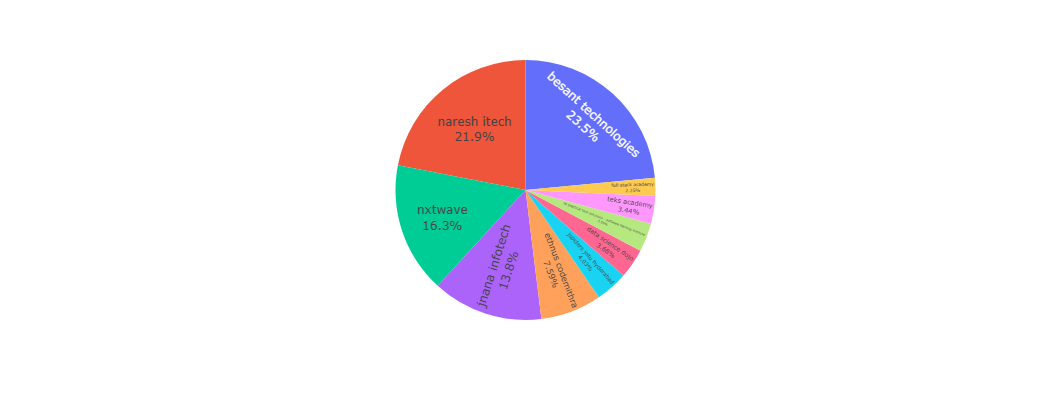


Column: Type

*****************************************
          Descriptive Stats              
*****************************************

Number of Unique Classes: 3

Unique Classes:
['sidecar' 'image' 'video']

Value Counts of each class (FDT):
Type
video      434
image      382
sidecar     33
Name: count, dtype: int64

Each Class percentage:
Type
video      51.12
image      44.99
sidecar     3.89
Name: count, dtype: float64

Mode value: video

*****************************************
      Visual Analysis - Pie Chart      
*****************************************

Top Catgeories:


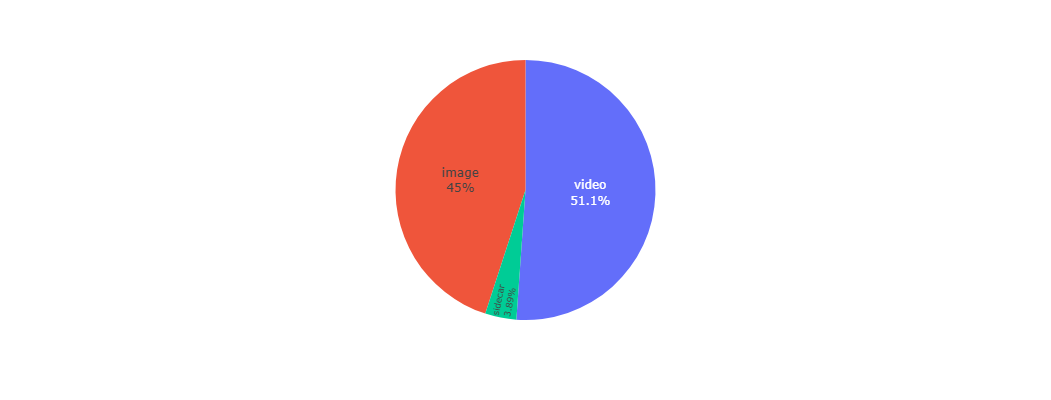


Column Name: LikesCount

*****************************************
          Descriptive Stats              
*****************************************

Mean: 299
Median: 68

Min & Max: (0, 21630)
Standard Deviation: 1111

Summary & Quantiles:
count      849.0
mean       299.0
std       1111.0
min          0.0
25%         26.0
50%         68.0
75%        201.0
max      21630.0
Name: LikesCount, dtype: float64

Skewness: 12
Kurtosis: 199

********************************************************
 Visual Analysis - Distplot (Histogram + Desnsity plot) 
********************************************************



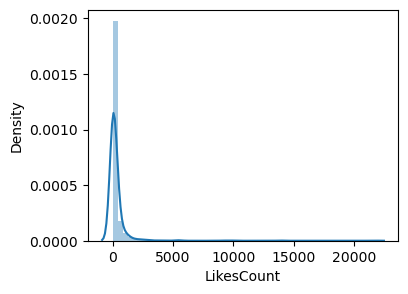

Column Name: CommentsCount

*****************************************
          Descriptive Stats              
*****************************************

Mean: 15
Median: 0

Min & Max: (0, 9466)
Standard Deviation: 326

Summary & Quantiles:
count     849.0
mean       15.0
std       326.0
min         0.0
25%         0.0
50%         0.0
75%         3.0
max      9466.0
Name: CommentsCount, dtype: float64

Skewness: 29
Kurtosis: 840

********************************************************
 Visual Analysis - Distplot (Histogram + Desnsity plot) 
********************************************************



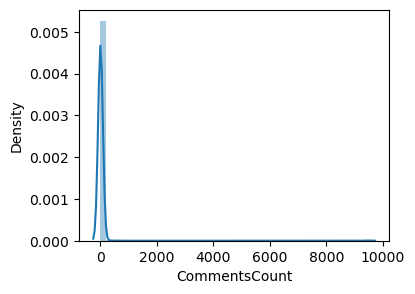

Column: Location

*****************************************
          Descriptive Stats              
*****************************************

Number of Unique Classes: 2

Unique Classes:
['banglore' 'hyderabad']

Value Counts of each class (FDT):
Location
hyderabad    476
banglore     373
Name: count, dtype: int64

Each Class percentage:
Location
hyderabad    56.07
banglore     43.93
Name: count, dtype: float64

Mode value: hyderabad

*****************************************
      Visual Analysis - Pie Chart      
*****************************************

Top Catgeories:


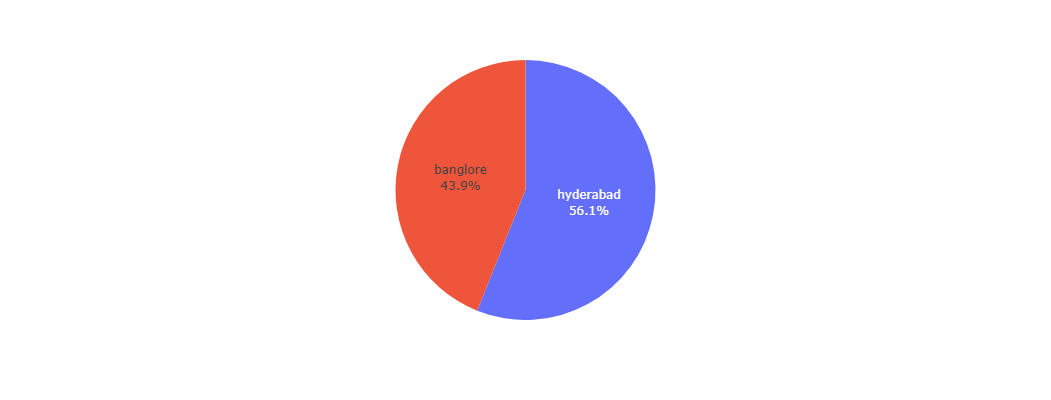


Column: postrelatedcourse

*****************************************
          Descriptive Stats              
*****************************************

Number of Unique Classes: 9

Unique Classes:
['datascience' 'fullstack' 'devops' 'developer' 'marketing' 'successstory'
 'autocad' 'placement' nan 'memes']

Value Counts of each class (FDT):
postrelatedcourse
datascience     330
fullstack       198
autocad         115
successstory     59
devops           43
memes            42
placement        38
marketing        11
developer         4
Name: count, dtype: int64

Each Class percentage:
postrelatedcourse
datascience     38.87
fullstack       23.32
autocad         13.55
successstory     6.95
devops           5.06
memes            4.95
placement        4.48
marketing        1.30
developer        0.47
Name: count, dtype: float64

Mode value: datascience

*****************************************
      Visual Analysis - Pie Chart      
*****************************************

Top Catgeor

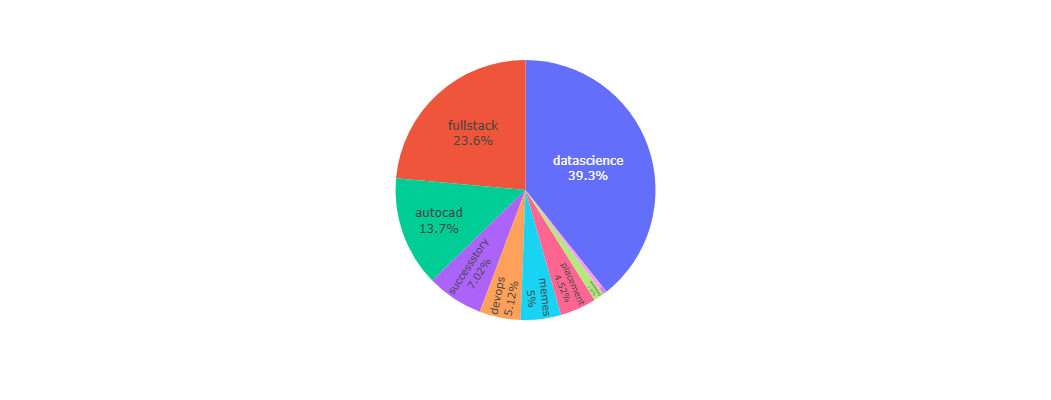


Column: Day

*****************************************
          Descriptive Stats              
*****************************************

Number of Unique Classes: 7

Unique Classes:
['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']

Value Counts of each class (FDT):
Day
monday       139
tuesday      139
thursday     131
friday       129
wednesday    128
saturday     121
sunday        62
Name: count, dtype: int64

Each Class percentage:
Day
monday       16.37
tuesday      16.37
thursday     15.43
friday       15.19
wednesday    15.08
saturday     14.25
sunday        7.30
Name: count, dtype: float64

Mode value: monday

*****************************************
      Visual Analysis - Pie Chart      
*****************************************

Top Catgeories:


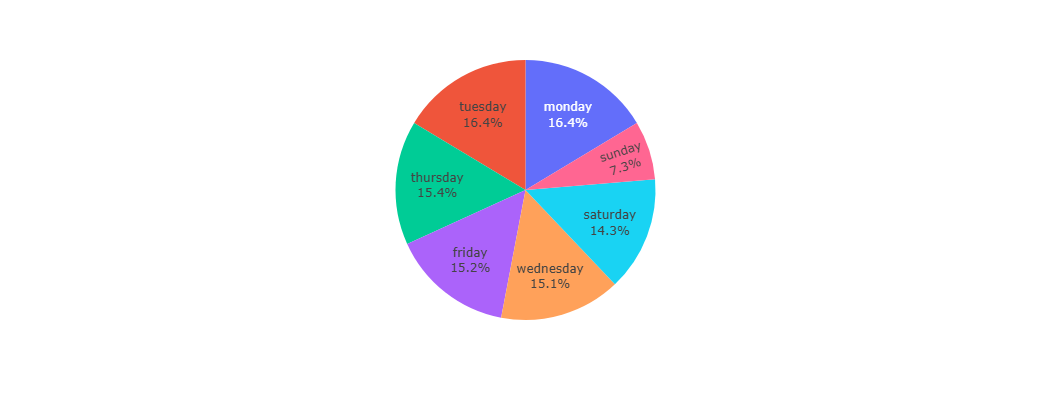

In [24]:
univariate(data)

DATA INSIGHTS AFTER UNIVARIATE ANALYSIS OF DATA

📌 General Statistics for "InstituteName" column
Total Unique Institutes: 12
Most Frequent Institute (Mode): Besant Technologies
📌 Top 5 Institutes by Count:
Besant Technologies – 198 (23.32%)
Naresh ITech – 185 (21.79%)
NxtWave – 137 (16.14%)
Jnana Infotech – 116 (13.66%)
Ethnus Codemithra – 64 (7.54%)
📌 Key Observations:
Highly Imbalanced Distribution – Top 5 institutes cover over 82% of the data.
Low Representation – The least frequent institute (Uday | Al | Tech | Tips) appears only once (0.12%).
data Concentration – Only a few institutes dominate the dataset.
📌 Potential Next Steps:
Check for Data Cleaning Needs – Standardize institute names to avoid duplicates.






Data Insights for "Type" Column
📌 General Statistics:
Total Unique Types: 3
Most Frequent Type (Mode): Video
📌 Distribution of Content Types:
Video – 434 (51.12%)
Image – 382 (44.99%)
Sidecar – 33 (3.89%)
📌 Key Observations:
Videos dominate the dataset, making up more than half (51.12%) of all entries.
Images are the second most common format, accounting for nearly 45% of the data.
Sidecar posts are rare, contributing to only 3.89% of the total.
📌 Potential Next Steps:
Analyze Engagement Trends – Do videos get more interaction compared to images?
Investigate Sidecar Posts – Why are they less frequent? Are they less effective or underutilized





Data Insights for "LikesCount" Column
📌 General Statistics:
Total Entries: 849
Mean Likes: 299
Median Likes: 68
Min & Max: (0, 21,630)
Standard Deviation: 1,111
📌 Distribution Insights:
Highly Skewed Data (Skewness = 12) – The dataset has a long right tail, meaning a few posts have extremely high likes.
High Kurtosis (199) – Indicates the presence of many extreme outliers.
Large Variation – The standard deviation (1,111) is much higher than the mean (299), reinforcing the uneven spread of data.
Quantile Breakdown:
25% of posts have ≤ 26 likes
50% (Median) of posts have ≤ 68 likes
75% of posts have ≤ 201 likes
A few posts have exceptionally high likes (Max = 21,630)
📌 Key Observations:
The majority of posts receive low engagement, but a few viral posts significantly inflate the mean.
Median (68) is much lower than the mean (299), confirming that most posts perform below average due to extreme outliers.
A small percentage of posts are driving most of the engagement (possibly viral content).
📌 Potential Next Steps:
Further Analysis: Identify factors driving high engagement (e.g., content type, hashtags).
Data Transformation: Consider log transformation to reduce skewness for better analysis.
Engagement Strategy: Study the top-performing posts to replicate success patterns.



Data Insights for "CommentsCount" Column
📌 Key Statistics:
Total Entries: 849
Mean Comments: 15 (inflated by outliers)
Median Comments: 0 (most posts receive no comments)
Min & Max: (0, 9,466)
Standard Deviation: 326 (high variation)
📌 Distribution Insights:
Highly Skewed (Skewness = 29) – A few viral posts dominate engagement.
Extreme Outliers (Kurtosis = 840) – Most posts have very few comments, but some have thousands.
75% of posts have ≤ 3 comments, while the top 1% drive most interactions.
📌 Key Observations:
Most posts get little to no engagement (Median = 0).
A small number of viral posts inflate the average.
Outliers distort the mean, making it unreliable for general analysis.
📌 Next Steps:
Focus on viral posts to understand engagement drivers.
Use log transformation to manage skewness.
Analyze correlation with likes & content type.



Data Insights for "Location" Column
📌 Key Statistics:
Total Unique Locations: 2 (Bangalore & Hyderabad)
Most Frequent Location (Mode): Hyderabad
📌 Distribution of Locations:
Hyderabad: 476 (56.07%)
Bangalore: 373 (43.93%)
📌 Key Observations:
Hyderabad has a slight majority (56%) over Bangalore.
Balanced distribution with no extreme dominance by one location.
Further analysis could explore location-based trends in engagement (likes, comments, etc.).
📌 Next Steps:
Compare engagement metrics across locations to identify trends.
Analyze content type distribution by city to see if preferences vary.


Data Insights for "PostRelatedCourse" Column
📌 Key Statistics:
Total Unique Course Categories: 9
Most Frequent Category (Mode): Data Science
📌 Top 3 Course Categories:
Data Science – 330 (38.87%)
Full Stack – 198 (23.32%)
AutoCAD – 115 (13.55%)
📌 Key Observations:
Data Science dominates (39%) the content focus.
Full Stack and AutoCAD together make up over 36% of posts.
Less common categories include Marketing (1.3%) and Developer (0.47%).
Presence of non-technical content (Memes: 4.95%, Success Stories: 6.95%).
📌 Next Steps:
Analyze engagement trends per course category.
Check if non-technical posts (memes, success stories) impact engagement



Data Insights for "Day" Column
📌 Key Statistics:
Total Unique Days: 7 (Monday to Sunday)
Most Frequent Days (Mode): Monday & Tuesday (16.37% each)
📌 Top 3 Active Days:
Monday & Tuesday – 139 posts (16.37% each)
Thursday – 131 posts (15.43%)
Friday – 129 posts (15.19%)
📌 Key Observations:
Monday & Tuesday have the highest number of posts.
Sunday has the lowest activity (7.30%), suggesting less content is posted on weekends.
Activity is relatively balanced across weekdays, with a drop on Saturdays and Sundays.
📌 Next Steps:
Analyze engagement metrics (likes/comments) per day to find the best posting days.
Compare weekend vs. weekday engagement trends.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   InstituteName      849 non-null    object             
 1   Type               849 non-null    object             
 2   LikesCount         849 non-null    int64              
 3   CommentsCount      849 non-null    int64              
 4   Dateofpost         849 non-null    datetime64[ns, UTC]
 5   Location           849 non-null    object             
 6   postrelatedcourse  840 non-null    object             
 7   Day                849 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 53.2+ KB


                                                 BI/MULTIVARIATE ANALYSIS 

                                           PURE NUMERICAL DATA COLUMNS

In [26]:
# correlation cofficient

print("LikesCount vs CommentsCount:")

display(round(data[['LikesCount', 'CommentsCount']].corr(),2))

LikesCount vs CommentsCount:


,LikesCount,CommentsCount
LikesCount,1.00,0.32
CommentsCount,0.32,1.00


BASED ON OUR REQUIREMENT WE HAVE TO CHOOSE THE VISUALIZING METHODS
✅ Histograms → Show distribution of numerical data
✅ Box Plots → Identify outliers in the dataset
✅ Pair Plots → Visualize relationships between variables
✅ Heatmap → Show correlation between numerical features

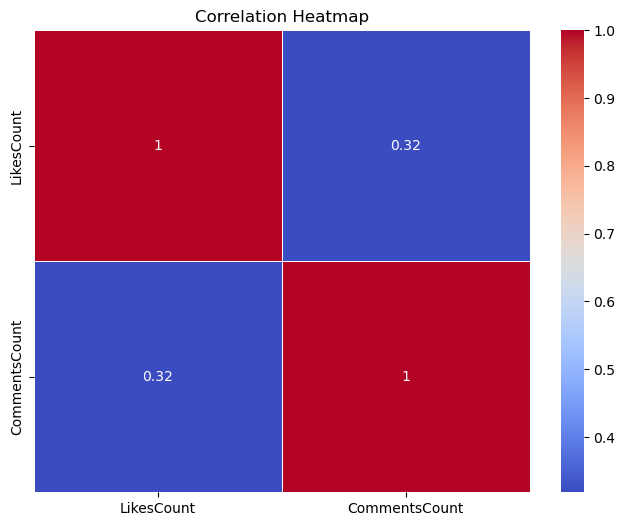

In [27]:
######HEATMAP IS USED FOR PURE NUMERCIAL DATA COLUMNS
plt.figure(figsize=(8,6))
sns.heatmap(data[['LikesCount', 'CommentsCount']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

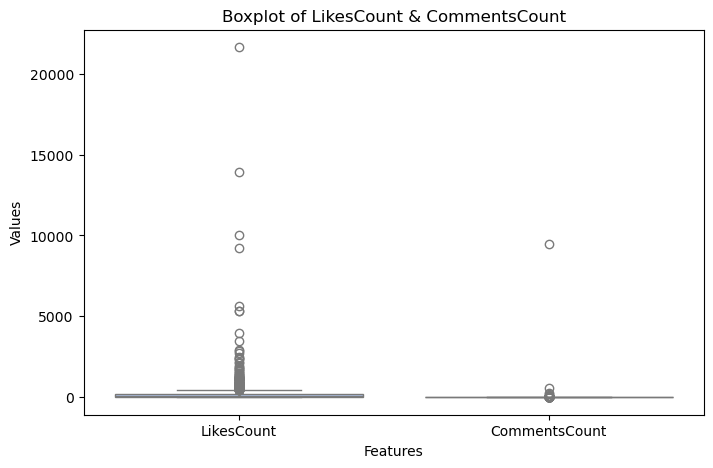

In [28]:
###Show distribution of numerical data

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, palette="coolwarm")

# Labels and Title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of LikesCount & CommentsCount")

# Show plot
plt.show()

DATA INSIGHTS FOR PURE NUMERICAL DATA COLUMNS

📊 Data Insights for Correlation = 0.32
📌 Understanding Correlation (0.32):
Correlation (r) = 0.32 indicates a weak positive relationship between the two numerical variables.
As one variable increases, the other tends to increase slightly, but the relationship is not strong.
📌 Key Observations:
There is some association, but it is not significant enough to make strong predictions.
The relationship may be influenced by other factors (e.g., hidden variables)


📌LikesCount has more outliers than CommentsCount, it means likes are more volatile (high variation).
📌Likes may be influenced by viral posts, promotions, or influencer engagement.
📌Comments have fewer outliers, indicating a more consistent user engagement pattern
📌 Possible Reasons for More Outliers in LikesCount:
✅ Virality Effect – Some posts might go viral, leading to extreme like counts.
✅ Influencer/Brand Impact – Some posts may be promoted, increasing like spikes.
Steps for Handling Outliers:
🔹 Use Median instead of Mean – To get a robust central value.
🔹 Apply Log Transformation – To reduce skewness in LikesCount.

                                                MIXED DATA COLUMNS

In [29]:
# We can use pandas groupby to get aggregation values of each class

print("Type vs LikesCount:")

display(round(data.groupby('Type')['LikesCount'].sum().sort_values(ascending=False), 2))

Type vs LikesCount:


Type
video      209637
image       35773
sidecar      8566
Name: LikesCount, dtype: int64

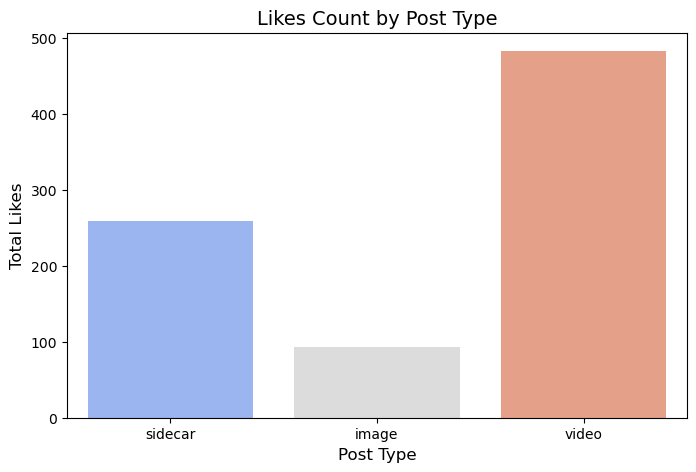

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='LikesCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("Post Type", fontsize=12)
plt.ylabel("Total Likes", fontsize=12)
plt.title("Likes Count by Post Type", fontsize=14)
plt.xticks(rotation=0)

# Show Plot
plt.show()

DATA INSIGHTS FOR TYPE AND LIKES COUNT
Key Takeaways from Chart:
✅ Videos dominate in LikesCount.
✅ Images get fewer likes than videos but more than sidecar posts.
✅ Sidecar posts receive the least engagement.

In [31]:
# We can use pandas groupby to get aggregation values of each class

print("Type vs CommentsCount:")

display(round(data.groupby('Type')['CommentsCount'].sum().sort_values(ascending=False), 2))

Type vs CommentsCount:


Type
video      12307
image        733
sidecar       39
Name: CommentsCount, dtype: int64

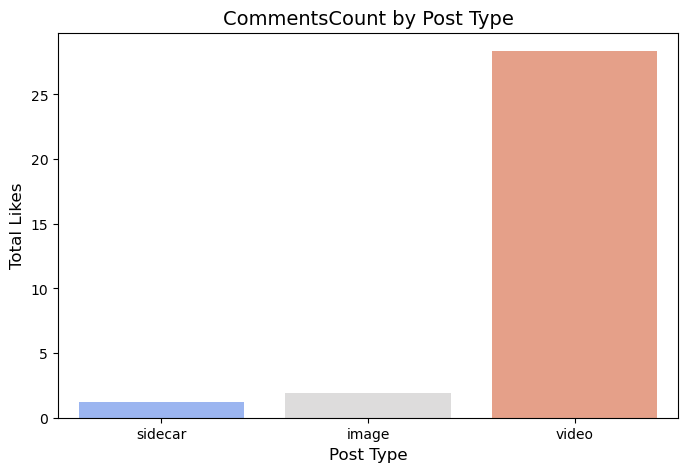

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='CommentsCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("Post Type", fontsize=12)
plt.ylabel("Total Likes", fontsize=12)
plt.title("CommentsCount by Post Type", fontsize=14)
plt.xticks(rotation=0)

# Show Plot
plt.show()

 Type vs CommentsCount
✅ Videos dominate in CommentsCount, receiving 12,307 comments, showing high engagement.
✅ Images get significantly fewer comments (733) than videos but more than sidecar posts.
✅ Sidecar posts receive the least engagement, with just 39 comments, indicating minimal interaction.

In [33]:
# We can use pandas groupby to get aggregation values of each class

print("Location vs CommentsCount:")

display(round(data.groupby('Location')['CommentsCount'].sum().sort_values(ascending=False), 2))

Location vs CommentsCount:


Location
hyderabad    12061
banglore      1018
Name: CommentsCount, dtype: int64

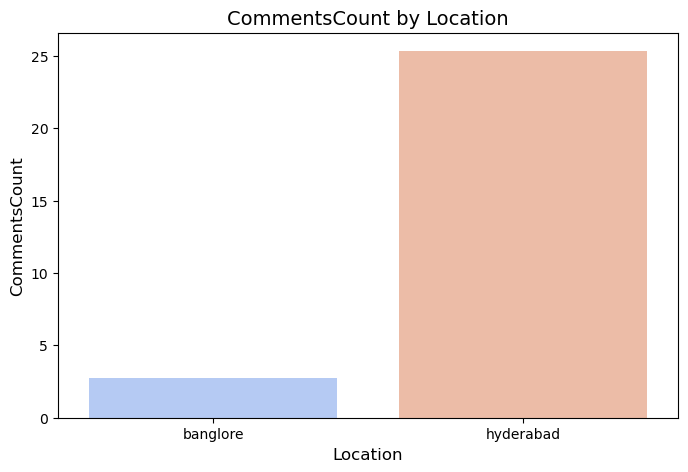

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Location", y='CommentsCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("Location", fontsize=12)
plt.ylabel('CommentsCount', fontsize=12)
plt.title("CommentsCount by Location", fontsize=14)
plt.xticks(rotation=0)

# Show Plot
plt.show()

Location vs CommentsCount
✅ Hyderabad dominates in CommentsCount, receiving 12,061 comments, indicating higher engagement.
✅ Bangalore has significantly fewer comments (1,018) compared to Hyderabad.
✅ Engagement in Hyderabad is much higher, suggesting stronger audience interaction or a larger active user base

In [35]:
# We can use pandas groupby to get aggregation values of each class

print("Location vs LikesCount:")

display(round(data.groupby('Location')['LikesCount'].sum().sort_values(ascending=False), 2))

Location vs LikesCount:


Location
hyderabad    219716
banglore      34260
Name: LikesCount, dtype: int64

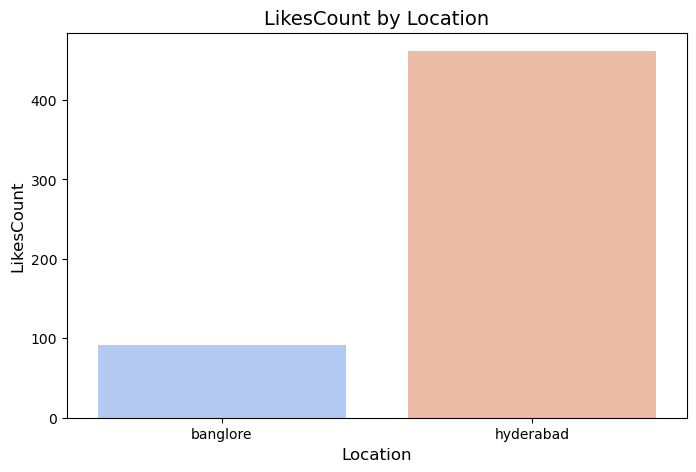

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Location", y='LikesCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("Location", fontsize=12)
plt.ylabel('LikesCount', fontsize=12)
plt.title("LikesCount by Location", fontsize=14)
plt.xticks(rotation=0)

# Show Plot
plt.show()

Location vs LikesCount
✅ Hyderabad dominates in LikesCount, receiving 219,716 likes, showing significantly higher engagement.
✅ Bangalore has far fewer likes (34,260) compared to Hyderabad.
✅ Audience interaction in Hyderabad is much stronger, indicating a larger or more engaged user base.

In [37]:
print("postrelatedcourse vs LikesCount:")

display(round(data.groupby('postrelatedcourse')['LikesCount'].sum().sort_values(ascending=False), 2))

postrelatedcourse vs LikesCount:


postrelatedcourse
datascience     73164
fullstack       68684
memes           27698
placement       25652
successstory    23257
autocad         21832
devops           5299
marketing        2294
developer        1015
Name: LikesCount, dtype: int64

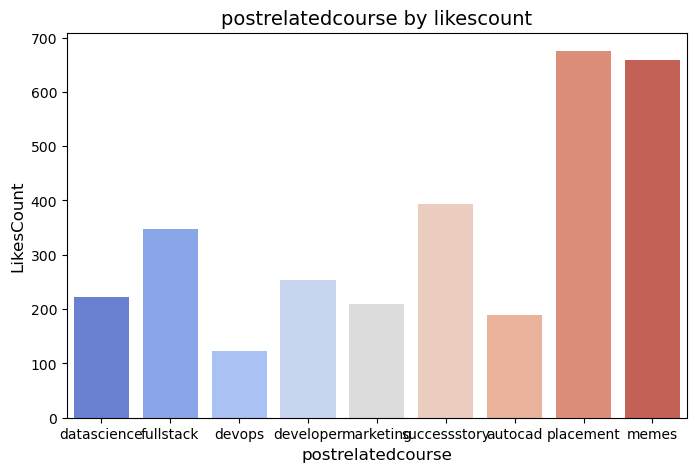

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x="postrelatedcourse", y='LikesCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("postrelatedcourse", fontsize=12)
plt.ylabel('LikesCount', fontsize=12)
plt.title("postrelatedcourse by likescount", fontsize=14)
plt.xticks(rotation=0)

# Show Plot
plt.show()

DATA INSIGHT IMPORTANT PostRelatedCourse vs LikesCount
✅ Data Science and Full Stack courses receive the most likes (73,164 & 68,684), indicating high interest.
✅ Memes, Placement, and Success Stories also generate significant engagement, showing audience interest in fun content & career updates.
✅ Developer, Marketing, and DevOps have the least likes, suggesting lower popularity or engagement in these topics.

In [39]:
print("postrelatedcourse vs CommentsCount:")

display(round(data.groupby('postrelatedcourse')['CommentsCount'].sum().sort_values(ascending=False), 2))

postrelatedcourse vs CommentsCount:


postrelatedcourse
successstory    9686
datascience     1376
fullstack        773
memes            765
autocad          223
placement        146
devops            39
marketing         26
developer          5
Name: CommentsCount, dtype: int64

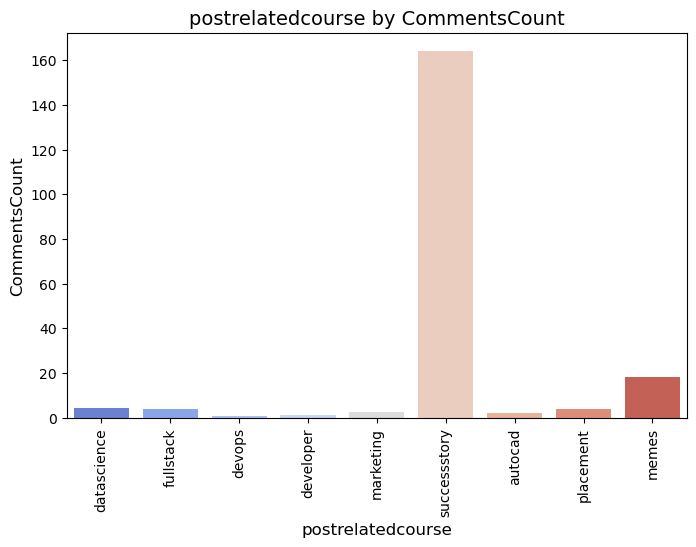

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x="postrelatedcourse", y='CommentsCount', data=data, palette='coolwarm', ci=None)
# Labels & Title
plt.xlabel("postrelatedcourse", fontsize=12)
plt.ylabel('CommentsCount', fontsize=12)
plt.title("postrelatedcourse by CommentsCount", fontsize=14)
plt.xticks(rotation=90)

# Show Plot
plt.show()

 PostRelatedCourse vs CommentsCount
✅ Success Stories receive the highest comments (9,686), showing strong audience engagement.
✅ Data Science, Full Stack, and Memes also have decent engagement, with 1,376, 773, and 765 comments, respectively.
✅ Developer, Marketing, and DevOps have the least comments, indicating lower discussion interest.

In [41]:
print("InstituteName vs CommentsCount:")

display(round(data.groupby('InstituteName')['CommentsCount'].sum().sort_values(ascending=False), 2))

InstituteName vs CommentsCount:


InstituteName
naresh itech                                                 10177
besant technologies                                           1009
nxtwave                                                        706
jnana infotech                                                 662
uday | al | tech | tips                                        257
ethnus codemithra                                              136
full stack academy                                              52
teks academy                                                    41
jspiders jntu hyderabad                                         20
data science dojo                                                9
insight - analytics club@mu                                      8
be practical tech solutions - software training institute        2
Name: CommentsCount, dtype: int64

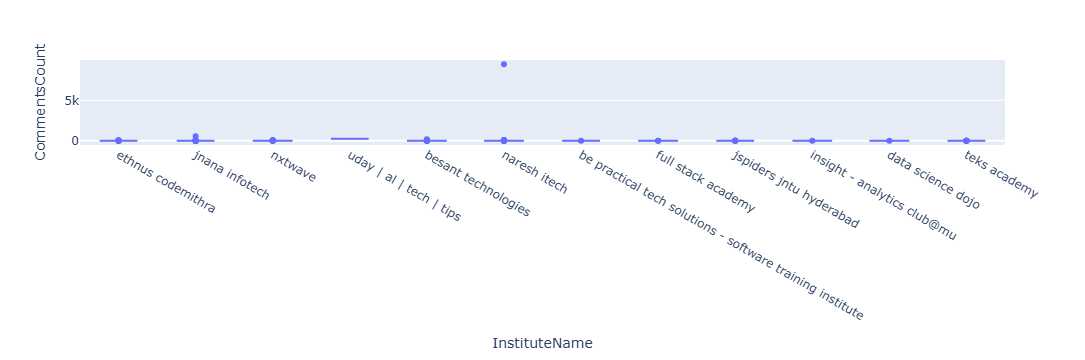

In [42]:
px.box(data, x="InstituteName", y="CommentsCount")

DATA INSIGHTS: InstituteName vs CommentsCount
✅ Naresh ITech dominates comments (10,177), showing massive engagement compared to others.
✅ Besant Technologies, NxtWave, and Jnana Infotech also have notable engagement, with 1,009, 706, and 662 comments, respectively.
✅ Institutes like Data Science Dojo, Insight - Analytics Club, and Be Practical Tech Solutions have minimal comments, indicating lower interaction.

In [43]:
print("InstituteName vs LikesCount:")

display(round(data.groupby('InstituteName')['LikesCount'].sum().sort_values(ascending=False), 2))

InstituteName vs LikesCount:


InstituteName
nxtwave                                                      124792
naresh itech                                                  51785
besant technologies                                           26342
ethnus codemithra                                             25056
jnana infotech                                                13728
jspiders jntu hyderabad                                        5025
full stack academy                                             1736
uday | al | tech | tips                                        1593
teks academy                                                   1541
data science dojo                                              1477
be practical tech solutions - software training institute       501
insight - analytics club@mu                                     400
Name: LikesCount, dtype: int64

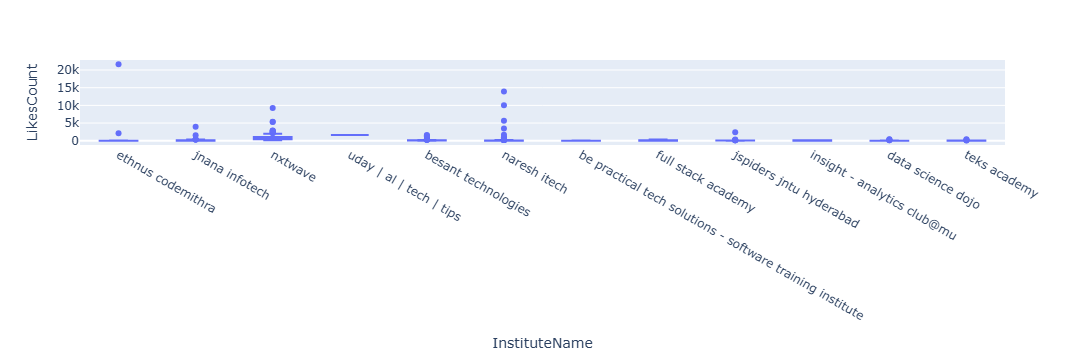

In [44]:
px.box(data, x="InstituteName", y="LikesCount")


 InstituteName vs LikesCount
✅ NxtWave leads in LikesCount (124,792 likes), indicating strong audience engagement.
✅ Naresh ITech and Besant Technologies follow with 51,785 and 26,342 likes, respectively.
✅ Ethnus Codemithra and Jnana Infotech also have decent engagement, with 25,056 and 13,728 likes.
✅ Smaller institutes like Insight - Analytics Club and Be Practical Tech Solutions have the lowest likes, suggesting less reach or engagement.

                                          PURE CATEGORICAL DATA

In [45]:
# We can use crosstab function in pandas to get FDT (Frequency Distribution Table) of each class

print("InstituteName vs Type:")

display(pd.crosstab(data['InstituteName'], data['Type'], margins=True))

InstituteName vs Type:


Type,image,sidecar,video,All
InstituteName,,,,
be practical tech solutions - software training institute,28,0,2,30
besant technologies,28,4,166,198
data science dojo,19,7,5,31
ethnus codemithra,34,4,26,64
full stack academy,8,1,10,19
insight - analytics club@mu,0,2,3,5
jnana infotech,72,1,43,116
jspiders jntu hyderabad,25,1,8,34
naresh itech,137,4,44,185


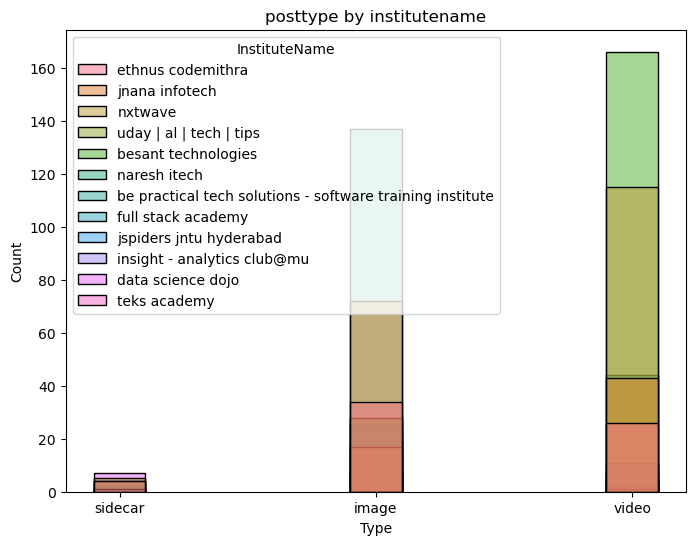

In [59]:
###HISTORGRAM FOR BIVARIATE ANALYSIS
plt.figure(figsize=(8,6))
sns.histplot(data, x="Type", hue="InstituteName",shrink=0.2)
plt.title("posttype by institutename")
plt.show()

InstituteName vs Type of Post
✅ Video posts dominate, especially for Besant Technologies (166), NxtWave (115), and Naresh ITech (44), indicating a preference for video content.
✅ Image posts are most frequent for Naresh ITech (137) and Jnana Infotech (72), showing strong engagement through images.
✅ Sidecar posts are the least common, with the highest count in Data Science Dojo (7) and NxtWave (5), suggesting lower usage.
✅ Overall, Video (434) > Image (382) > Sidecar (33), highlighting the effectiveness of video-based content across institutes.
✅ Certain institutes like "Uday | Al | Tech | Tips" post almost no content, while others like Besant Technologies and Naresh ITech are highly active.

In [53]:
print("InstituteName vs Location:")

display(pd.crosstab(data['InstituteName'], data['Location'], margins=True))

InstituteName vs Location:


Location,banglore,hyderabad,All
InstituteName,,,
be practical tech solutions - software training institute,0,30,30
besant technologies,197,1,198
data science dojo,0,31,31
ethnus codemithra,62,2,64
full stack academy,0,19,19
insight - analytics club@mu,0,5,5
jnana infotech,114,2,116
jspiders jntu hyderabad,0,34,34
naresh itech,0,185,185


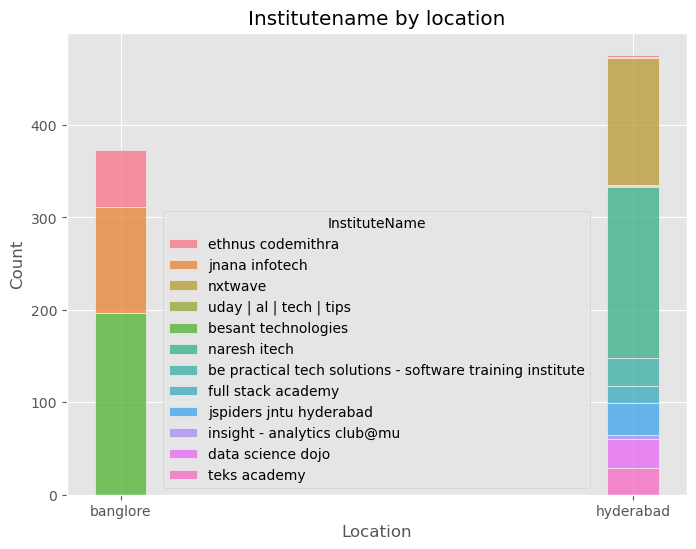

In [67]:
###HISTORGRAM FOR BIVARIATE ANALYSIS
plt.figure(figsize=(8,6))
sns.histplot(data, x="Location", hue="InstituteName",multiple="stack",shrink=0.1)
plt.title("Institutename by location")
plt.show()

DATA INSIGHTS:
✅Hyderabad has a higher enrollment count than Bangalore.
✅Besant Technologies (197 enrollments) dominates the Bangalore market.
✅Hyderabad shows stronger demand for training programs.

In [60]:
print("InstituteName vs postrelatedcourse:")

display(pd.crosstab(data['InstituteName'], data['postrelatedcourse'], margins=True))

InstituteName vs postrelatedcourse:


postrelatedcourse,autocad,datascience,developer,devops,fullstack,marketing,memes,placement,successstory,All
InstituteName,,,,,,,,,,
be practical tech solutions - software training institute,3,10,0,2,7,1,3,3,1,30
besant technologies,27,93,0,2,36,3,8,9,20,198
data science dojo,0,29,0,1,0,0,1,0,0,31
ethnus codemithra,1,11,1,3,24,0,10,5,8,63
full stack academy,1,13,0,3,0,0,0,1,1,19
insight - analytics club@mu,0,4,0,0,1,0,0,0,0,5
jnana infotech,40,38,0,1,29,1,1,1,1,112
jspiders jntu hyderabad,0,5,0,1,4,0,0,14,10,34
naresh itech,29,59,2,20,62,1,1,1,10,185


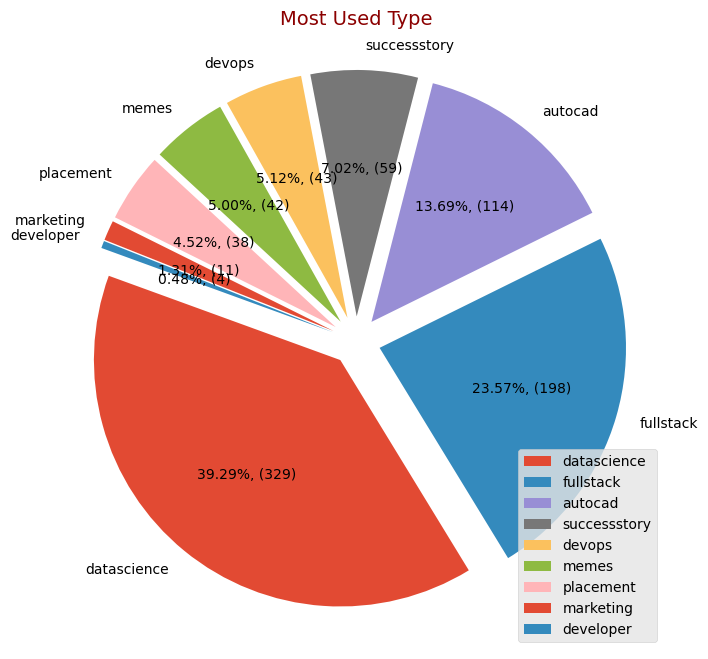

In [76]:
# Pie Chart 
classes = data['postrelatedcourse'].value_counts().sort_values(ascending=False).index[:10]
vals = data['postrelatedcourse'].value_counts().sort_values(ascending=False).values[:10]  # Match with classes

plt.style.use("ggplot")
plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('black')  # Set background color

explode = [0.1] * len(classes) # Slight separation for all slices
plt.pie(
    x=vals, labels=classes, explode=explode,  
    autopct=lambda p: f'{p:.2f}%, ({int(p*sum(vals)/100)})',
    startangle=160)
plt.title("Most Used Type", fontsize=14, color='darkred')
plt.legend(loc="best", fontsize=10)
plt.show()

DATA INSIGHTS:✅Data Science dominates across multiple institutes, showing strong interest.
✅Placement & Success Stories are crucial for student engagement.

In [77]:
print("InstituteName vs Day:")

display(pd.crosstab(data['InstituteName'], data['Day'], margins=True))

InstituteName vs Day:


Day,friday,monday,saturday,sunday,thursday,tuesday,wednesday,All
InstituteName,,,,,,,,
be practical tech solutions - software training institute,4,4,3,6,4,4,5,30
besant technologies,28,29,25,21,32,33,30,198
data science dojo,5,3,2,3,4,8,6,31
ethnus codemithra,9,7,7,5,12,14,10,64
full stack academy,3,3,1,6,3,0,3,19
insight - analytics club@mu,1,1,0,1,1,1,0,5
jnana infotech,19,22,12,0,21,24,18,116
jspiders jntu hyderabad,2,15,6,0,6,3,2,34
naresh itech,38,33,42,11,18,19,24,185


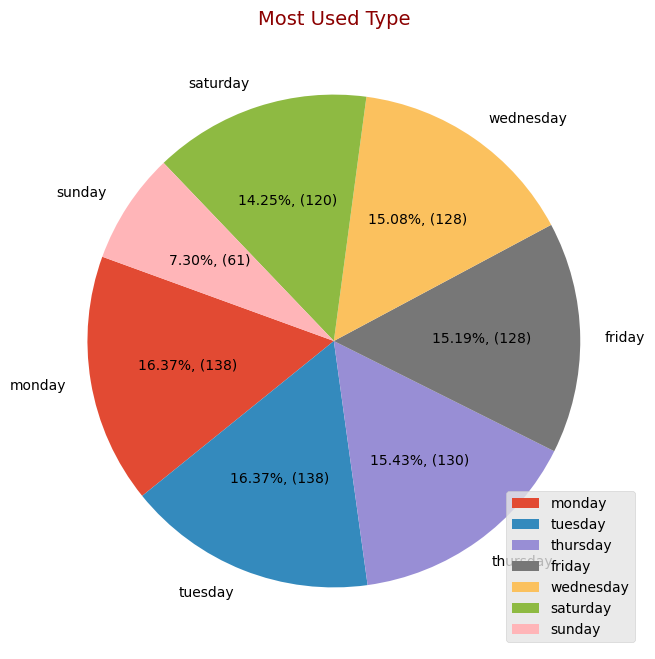

In [82]:
# Pie Chart 
classes = data['Day'].value_counts().sort_values(ascending=False).index[:10]
vals = data['Day'].value_counts().sort_values(ascending=False).values[:10]  # Match with classes

plt.style.use("ggplot")
plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('black')  # Set background color

plt.pie(x=vals, labels=classes, 
        autopct=lambda p: f'{p:.2f}%, ({int(p*sum(vals)/100)})',
    startangle=160)
plt.title("Most Used Type", fontsize=14, color='darkred')
plt.legend(loc="best", fontsize=10)
plt.show()

DATA INSIGHTS:Institutes post more at the start of the week (Monday & Tuesday).
Total Weekday Posts (Mon-Fri): 666 posts (78%)
Total Weekend Posts (Sat-Sun): 183 posts (22%)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   InstituteName      849 non-null    object             
 1   Type               849 non-null    object             
 2   LikesCount         849 non-null    int64              
 3   CommentsCount      849 non-null    int64              
 4   Dateofpost         849 non-null    datetime64[ns, UTC]
 5   Location           849 non-null    object             
 6   postrelatedcourse  840 non-null    object             
 7   Day                849 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 53.2+ KB


                                        MULTIVARIATE ANALYSIS

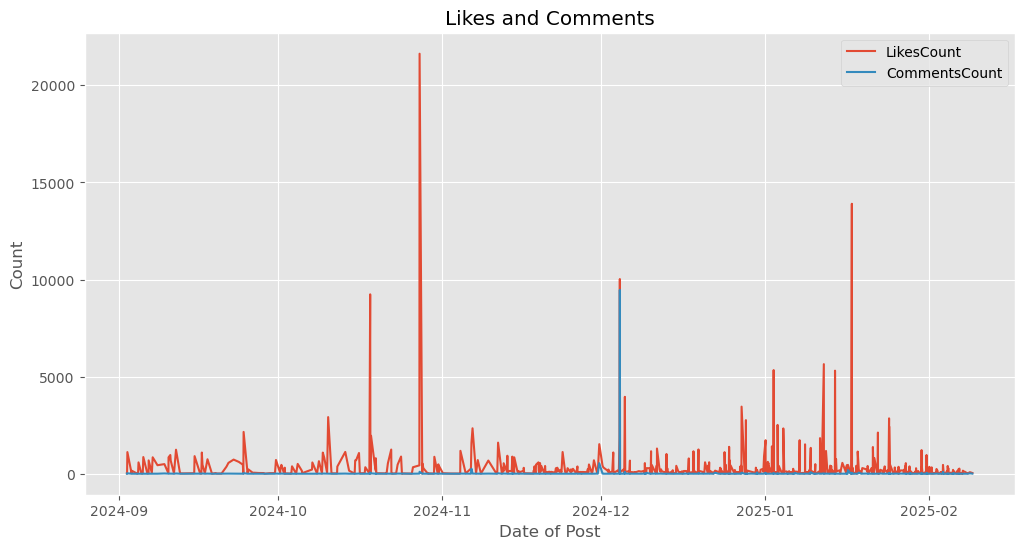

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=raw, x='Dateofpost', y='LikesCount', label='LikesCount')
sns.lineplot(data=raw, x='Dateofpost', y='CommentsCount', label='CommentsCount')
plt.title('Likes and Comments')
plt.xlabel('Date of Post')
plt.ylabel('Count')
#plt.legend()
plt.show()

✅The graph shows how likes and comments on posts changed over time. There are several spikes, meaning some posts got much more attention than others. The biggest peak is in November 2024, where likes went over 20,000, suggesting a viral post. Other high-engagement periods are in December 2024 and January 2025.
✅Likes are generally much higher than comments, meaning people engage more passively. However, in December 2024, there was a noticeable increase in comments, showing that some posts encouraged discussions

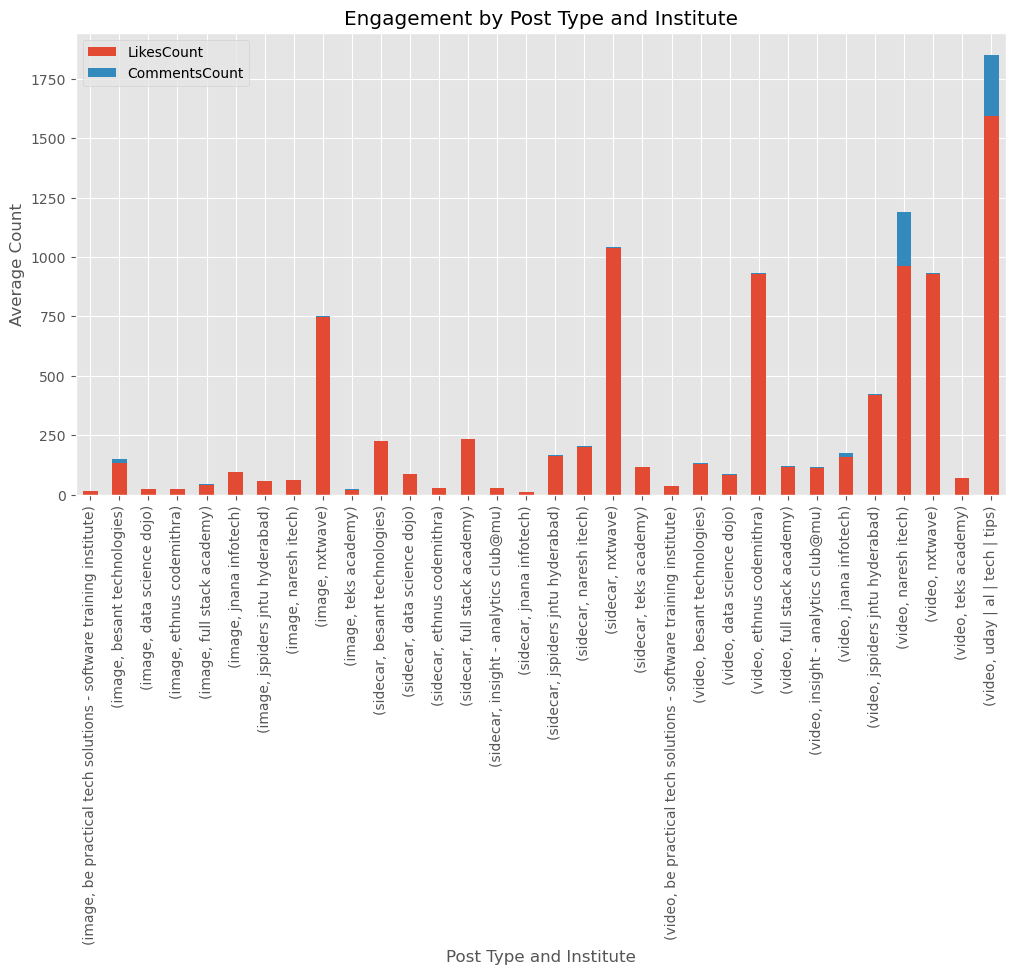

In [99]:
# Group by Type and InstituteName, then calculate the average Likes and Comments
institute_type = raw.groupby(['Type', 'InstituteName'])[['LikesCount', 'CommentsCount']].mean()
institute_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Engagement by Post Type and Institute')
plt.ylabel('Average Count')
plt.xlabel('Post Type and Institute')
plt.show()

✅Some institutes receive significantly higher engagement (likes and comments) than others.
The rightmost bar (possibly a popular institute) dominates engagement, suggesting better content reach and audience interaction.
Several institutes have very low engagement, indicating less visibility or audience interest.